<a href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/03_BUILD_USER_gRNA_plasmid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
%%capture
!pip install pydna
!pip install constrain
!pip install matplotlib

In [2]:
from pydna.dseqrecord import Dseqrecord
from pydna.dseq import Dseq
from Bio.Restriction import AsiSI, BsmI
from pydna.parsers import parse_primers
from pydna.amplify import pcr
from pydna.assembly import Assembly
from pydna.gel import gel
from pydna.ladders import *
from Bio import SeqIO

We can clone the ConStrain Repo to this notebook - 
benefitting from all the cool features of ConStrain. 


In [3]:
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

Cloning into 'ConStrain_on_google_colab'...
remote: Enumerating objects: 521, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 521 (delta 79), reused 253 (delta 52), pack-reused 238
Receiving objects: 100% (521/521), 56.40 MiB | 27.19 MiB/s, done.
Resolving deltas: 100% (169/169), done.


# Project - Making a USER plasmid 

**Hypothesis**
1. Specific combinations of CPR / G8H homologs and corresponding expression levels can remove the G8H bottleneck in the Strictosidine pathway

Aim: To test the hypothesis

Tasks
1. **dgRNA**
    - to knockout G8H and CPR in MIA-CM-3
2. Base strain
3. Library
4. Phenotyping
5. Data analysis


The workflow: 

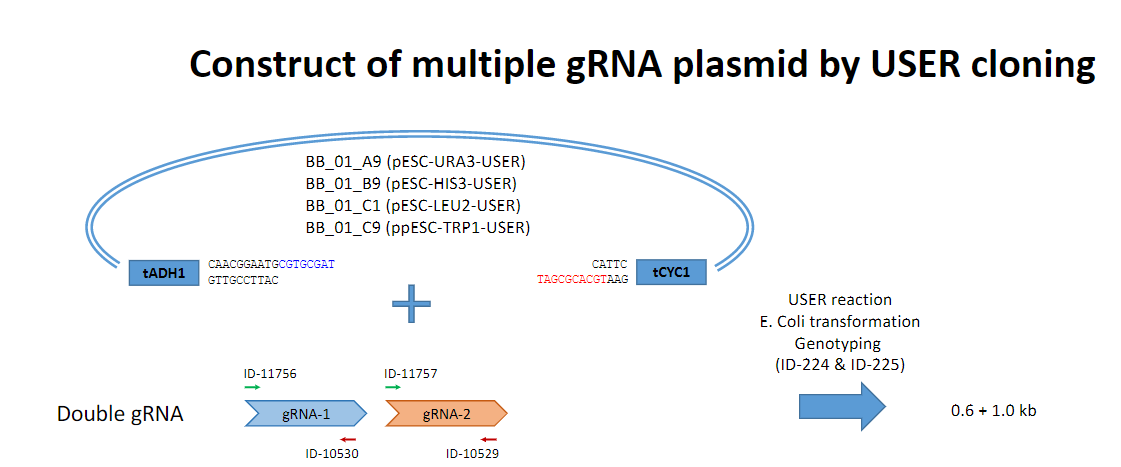

In [4]:
from IPython.display import Image
Image("/content/ConStrain_on_google_colab/pictures/Construct_multiple_gRNA.png", width=1000, height=400)

# Plasmid construction

We can import Fasta files with biopython. Alternatively this could be done directly from a database such as benchling or teselagen or ConStrains CSV_database

In [5]:
from constrain.lims.csv_database import get_database, get_dna_from_plate_name, get_dna_from_box_name

So the following code shows the plasmids we have stored in boxes and contains information about location, when it was added and so on. We can add concentration and more if we want. 

In [7]:
plasmid_plates = get_database('plasmid_plates', path= '/content/ConStrain_on_google_colab/Data/csv_database/')
plasmid_plates.head(10)

,ID,name,date,plate,row,col,size,seq,concentration,volume,features,location,reference,comments,description
0,10000.0,Backbone_template - p0056_(pESC-LEU-ccdB-USER)...,08-15-2022,0,A,1,8798.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,119.0,90.0,[],NaN,NaN,NaN,seq_xRUzXWHM <unknown description>
1,10001.0,gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta,08-15-2022,0,A,2,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,138.0,119.0,[],NaN,NaN,NaN,seq_Qy1hV9Gf <unknown description>
2,10002.0,LEU_plasmid.fasta,08-15-2022,0,A,3,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,85.0,148.0,[],NaN,NaN,NaN,seq_Qy1hV9Gf <unknown description>
3,10003.0,PL_02_E2(pRS413U-P2_PGK1-mKate2.fasta,08-15-2022,0,A,4,6982.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,148.0,91.0,[],NaN,NaN,NaN,seq_stP1p5JB <unknown description>
4,10004.0,pCfB-56(pESC-LEU-gRNA_ATF1-CroCPR).fasta,08-15-2022,0,A,5,7797.0,TGGCGGGTGTCGGGGCTGGCTTAACTATGCGGCATCAGAGCAGATT...,90.0,136.0,[],NaN,NaN,NaN,seq_AA4vOQs1 <unknown description>
5,10005.0,gRNA1_template (1).fasta,08-15-2022,0,A,6,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,146.0,115.0,[],NaN,NaN,NaN,seq_Qy1hV9Gf <unknown description>
6,10006.0,pl_12_i6_pesc-ura-grna_xi2-2.gb,08-15-2022,0,A,7,5734.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,128.0,112.0,[SeqFeature(FeatureLocation(ExactPosition(416)...,NaN,NaN,NaN,NaN
7,10007.0,TRP_POS_CONTROL_test.gb,08-15-2022,0,A,8,8798.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,94.0,149.0,[SeqFeature(FeatureLocation(ExactPosition(662)...,NaN,NaN,NaN,NaN
8,10008.0,pRS416.gb,08-15-2022,0,A,9,4898.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,120.0,105.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",NaN,NaN,NaN,pRS416
9,10009.0,pRS414.gb,08-15-2022,0,A,10,4788.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,77.0,90.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",NaN,NaN,NaN,pRS414


In [10]:
# Now we can get the plasmids we are interested in using for this workflow by simply calling the following: 

backbone = [get_dna_from_plate_name('Backbone_template - p0056_(pESC-LEU-ccdB-USER) (1).fasta', 'plasmid_plates', database_path="/content/ConStrain_on_google_colab/Data/csv_database/")]
gRNA1_template = [get_dna_from_plate_name('gRNA1_template (1).fasta', 'plasmid_plates', database_path="/content/ConStrain_on_google_colab/Data/csv_database/")]
gRNA2_template = [get_dna_from_plate_name('gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta', 'plasmid_plates', database_path="/content/ConStrain_on_google_colab/Data/csv_database/")]

In [11]:
# The imported fasta files are made into biopython objects as seen below: 
gRNA2_template

[SeqRecord(seq=Seq('TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCTCCCGGAGA...GTC'), id=10001, name='gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta', description='seq_Qy1hV9Gf <unknown description>', dbxrefs=[])]

In [12]:
# we can make the vector circular
vector = Dseqrecord(backbone[0], circular = True)

In [13]:
vector.name = "p0056\(pESC-LEU-ccdB-USER)"
vector.annotations['batches'] = [{'location'     :'l4_I06',
                                       'volume'       : 50,
                                       'concentration': 200}]

Now we can import some pre-made USER primers

In [14]:
from pydna.parsers import parse_primers
U_pSNR52_Fw_1,TJOS_66_P2R,U_pSNR52_Fw_2,TJOS_65_P1R = parse_primers(''' >U_pSNR52_Fw_1
                                      CGTGCGAUTCTTTGAAAAGATAATGTATGA

                                      >TJOS_66_P2R
                                      ACCTGCACUTAACTAATTACATGACTCGA 
                                      
                                      >U_pSNR52_Fw_2
                                      AGTGCAGGUTCTTTGAAAAGATAATGTATGA
                                      
                                      >TJOS_65_P1R
                                      CACGCGAUTAACTAATTACATGACTCGA''')

And annotate where they can be found

In [15]:
U_pSNR52_Fw_1.annotations['batches']   = [{'location':'o3_E07'}]
TJOS_66_P2R.annotations['batches']   = [{'location':'o3_E08'}]
U_pSNR52_Fw_2.annotations['batches']   = [{'location':'o3_E09'}]
TJOS_65_P1R.annotations['batches']   = [{'location':'o3_F01'}]

We can perform a PCR with the templates and the USER primers

In [16]:
from pydna.amplify import pcr
gRNA1_pcr_prod = pcr(U_pSNR52_Fw_1,TJOS_66_P2R, gRNA1_template)
gRNA2_pcr_prod = pcr(U_pSNR52_Fw_2,TJOS_65_P1R, gRNA2_template)


We can check the lenght and sequence of the predicted PCR

In [17]:
gRNA1_pcr_prod.seq

Dseq(-425)
CGTG..AGGT
GCAC..TCCA

In [18]:
gRNA2_pcr_prod.seq

Dseq(-425)
AGTG..CGTG
TCAC..GCAC

In [19]:
from constrain.design.cloning import USER_enzyme

With the USER_enzyme function we can generate USER tails from the PCR reaction

In [20]:
gRNA1_pcr_USER = USER_enzyme(gRNA1_pcr_prod)
gRNA2_pcr_USER = USER_enzyme(gRNA2_pcr_prod)

In [21]:
gRNA1_pcr_USER.seq

Dseq(-425)
        TCTT..GTTAAGTGCAGGT
GCACGCTAAGAA..CAAT         

In [22]:
gRNA2_pcr_USER.seq

Dseq(-425)
         TCTT..GTTAATCGCGTG
TCACGTCCAAGAA..CAAT        

Now we need to open the vector with (1) restriction enzyme and (2)a nicking enzyme

In [23]:
# AsiSI cuts two places and will generate 2 fragments
vector.cut(AsiSI)

(Dseqrecord(-6972), Dseqrecord(-1830))

In [24]:
# we need the longer fragment and therfore save it as a variable vector_asiSI
vector_asiSI, cCCDB  = vector.cut(AsiSI)

print(len(vector_asiSI.seq.watson))
vector_asiSI.seq

6970


Dseq(-6972)
  CGCG..TGCGAT
TAGCGC..ACGC  

Now we can nick the plasmid in the following way

In [25]:
vector_asiSI_nick = Dseq(watson=vector_asiSI.seq.watson[6:],crick=vector_asiSI.seq.crick[6:], ovhg=8)

vector_asiSI_nick = Dseqrecord(vector_asiSI_nick)
print(len(vector_asiSI_nick.seq.watson))
vector_asiSI_nick.seq


6964


Dseq(-6972)
        CATT..AATGCGTGCGAT
TAGCGCACGTAA..TTAC        

Now we can assemble the vector and the two pcr products that have been treated with USER enzyme. If the sticky ends are not compatible the program will produce a warning 

Now we can simulate a cloning step the the gRNAs and the vector together

In [26]:
rec_vec =  (vector_asiSI_nick + gRNA1_pcr_USER + gRNA2_pcr_USER).looped()
rec_vec.seq

Dseq(o7797)
CATT..CGTG
GTAA..GCAC

#PCR

Next step would include actually making the PCRs to assemble the plasmid and we start by annotating our PCR products with locations

In [27]:
gRNA1_pcr_prod.name = "ATF1"
gRNA1_pcr_prod.annotations['batches'] = [{'location':'l4_I07'}]
gRNA1_pcr_prod.annotations['template_location'] = "PL_05_D9"

gRNA2_pcr_prod.name = "CroCPR"
gRNA2_pcr_prod.annotations['batches'] = [{'location':'l4_I08'}]
gRNA2_pcr_prod.annotations['template_location'] = "p1_F04"

In [28]:
from constrain.lab.PCR import pcr_locations

# It looks like such when we try to find the locations of the PCR products
pcr_locations([gRNA1_pcr_prod, gRNA2_pcr_prod])

,location,name,template,fw,rv
0,nan0A6,ATF1,nan0A6,o3_E07,o3_E08
1,nan0A2,CroCPR,nan0A2,o3_E09,o3_F01


Next step is to make a calculation of of the different reaction volumes that are needed for the PCRs. We can do that with the function pcr_volumes in the following way:

In [29]:
from constrain.lab.PCR import pcr_volumes

pcr_volumes(vol_p_reac = 20, 
        no_of_reactions = 3,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_3_reac
Template,0.4,1.2
Primer 1,1.0,3.0
Primer 2,1.0,3.0
H20,7.6,22.8
Pol,10.0,30.0
Total,20.0,60.0


We can simmulate what a gel would look when the PCR products are run in the following way: 

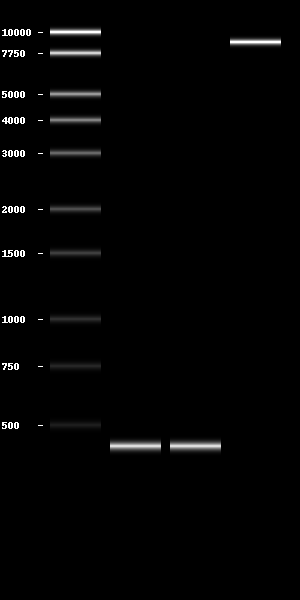

In [30]:
gel([PennStateLadder,[Dseqrecord("A"*425)],[Dseqrecord("A"*425)], [vector]])

It is beneficial to keep track of volumes of each PCR and concentration and for that we can update the annotation as such: 



In [31]:
gRNA1_pcr_prod.annotations['batches'][0].update({'volume'       : 50,
                                                 'concentration': 50})
gRNA2_pcr_prod.annotations['batches'][0].update({'volume'       : 50,
                                                 'concentration': 50})

In [32]:
LEU_plasmid = vector  
LEU_plasmid.name = "LEU_plasmid"
LEU_plasmid.annotations['batches'] = [{'location'     :'p1_F06',
                                       'volume'       : 30,
                                       'concentration': 470}]



Next, we want to perform a transformation reaction to assemble our plasmid and for that we need to make controls as shown below


In [33]:
reaction_names = ["pESC-LEU-gRNA_ATF1-CroCPR", "n.ctr", "n.ctr", "n.ctr", "p. ctr"]

In [34]:
reaction_participants = [[vector, gRNA1_pcr_prod,gRNA2_pcr_prod],
                         [vector],
                         [gRNA1_pcr_prod],
                         [gRNA2_pcr_prod], 
                         [LEU_plasmid]]

In [35]:
from constrain.lab.transformation import ng_to_nmol, transformation_mix

To get a succesfull transformation we need the right molar ratios and that can be calculated with the ng_to_mol function

In [36]:
nmol_vector = ng_to_nmol(ng = 15, bp = len(vector))
nmol_gRNA = ng_to_nmol(ng = 30, bp = len(gRNA1_pcr_prod))
nmol_pctr = ng_to_nmol(ng = 10, bp = len(LEU_plasmid))

In [37]:
# in nmol
wanted_concentrations = {'p0056\\(pESC-LEU-ccdB-USER)' : nmol_vector,
                         'ATF1'                        : nmol_gRNA,
                         'CroCPR'                      : nmol_gRNA,
                         'LEU_plasmid'                 : nmol_pctr}

In [38]:
media = ['LB_AMP'] * 5

Finally, we can make a transformation mix with the different parts (in the right ratios) and plate them on the designated plates as shown below

In [39]:
transformation_mix(reaction_names, 
                  reaction_participants, 
                  wanted_amounts = wanted_concentrations,
                  water_dna_p_reac = 10,
                  media = media)

,name,LEU_plasmid,ATF1,CroCPR,water,plate on
0,pESC-LEU-gRNA_ATF1-CroCPR,0.0,0.6,0.6,8.8,LB_AMP
1,n.ctr,0.0,NaN,NaN,10.0,LB_AMP
2,n.ctr,NaN,0.6,NaN,9.4,LB_AMP
3,n.ctr,NaN,NaN,0.6,9.4,LB_AMP
4,p. ctr,0.0,NaN,NaN,10.0,LB_AMP


We need to make the USER reaction mix

In [40]:
pcr_volumes(vol_p_reac = 10, 
        no_of_reactions = 6,
        standard_reagents = ["DNA","Buffer, Cutsmart","H20","Enz, USER"],
        standard_volumes = [1,1,7,1])

,vol_p_reac,vol_p_6_reac
DNA,1.0,6.0
"Buffer, Cutsmart",1.0,6.0
H20,7.0,42.0
"Enz, USER",1.0,6.0
Total,10.0,60.0



|  | °C | min | 
| --- | --- | --- |
| Incubate | 37 | 25 | 
|  | 25 | 15 | 
|  | 0 | ... | 





Transformation:

Add 90 µl DH5a cells to 10 µl USER reaction & incubate


|  | °C | min | 
| --- | --- | --- |
| Incubate | 0 | 30 | 
|  | 42 | 1.5 (90s) | 
|  | 0 | 5 | 

### Plate on lb amp and insert picture of the transformation below: 
Image('../figures/transformations/name_of_file.jpg', width=600)

1. Pick 4 colonies from data (x example(2021-01-12)) plate no. 1
2. Plasmid prep
3. Sanger sequence from both ends

Importing primers for colony PCR

In [41]:
ADH1_test_fw,CYC1_test_rv, = parse_primers(''' >ADH1_test_fw
                                      GAAATTCGCTTATTTAGAAGTGTC
                                      >CYC1_test_rv
                                      CTCCTTCCTTTTCGGTTAGAG''')

In [42]:
ADH1_test_fw.annotations['batches']   = [{'location':'o1_C07'}]
CYC1_test_rv.annotations['batches']     = [{'location':'o1_C08'}]

| Colony no. | Primer_batch_location | Result|
| --- | --- |--- |
| 1 | o1_C07 | Correct |
| 2 | o1_C07 | Wrong |
| 3 | o1_C07 | Correct |
| 4 | o1_C07 | Bad trace |
| 1 | o1_C08 | Correct |
| 2 | o1_C08 | Wrong |
| 3 | o1_C08 | Correct |
| 4 | o1_C08 | Bad trace |

Conclusion: Colony no. 1 and 3 seems correct

Sample 1 becomes batch 001 in location p1_G09
Sample 3 becomes batch 002 in location p1_I01

In [43]:
rec_vec.name = 'Double_gRNA_vecor_p1_G09_(pESC-LEU-gRNA_ATF1_CroCPR)'


In [44]:
rec_vec.annotations['batches'] = [{'location':['p1_G09']},{'location':['p1_I01']}]

Now we can upload the the sequence and location to a local LIMS system or a database